# 447 20fa exam 1 due 5p Fri Nov 6

***Notes regarding regrade requests:***

* ***I will accept regrade requests until Fri Nov 20*** -- this will give you time to review your exam and the solutions before requesting a regrade.
* To request a regrade, send me a message using Canvas Conversations with a short explanation of which problem(s) you want regarded, and why you think your solution is equivalent to or equally valid as the one provided.
* ***Note that it is possible your score will decrease after the regrade***, so please be sure you understand the problem and solution before making a request.  To help you understand the problems and their solutions before you submit your request, I am happy to answer questions during office hours.

16.5 <= scores <= 22.0
median score = 20.0 = 100%


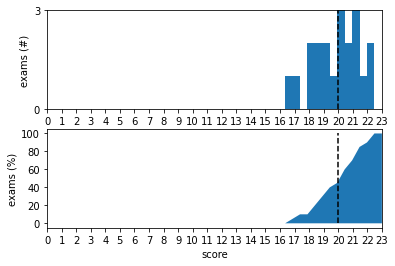

In [ ]:
import numpy as np
import pylab as plt

scores = np.asarray([16.5, 17.0, 18.0, 18.0, 18.5, 18.75, 19.0, 19.0, 19.5, 20.0, 20.0, 20.0, 20.5, 20.5, 21.0, 21.0, 21.0, 21.5, 22.0, 22.0])

total = 20

med = np.median(scores)

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f = %0.0f%%'%(med,100*med/total))

xlim = (0,23)
dxlim = (xlim[1]-xlim[0])

plt.figure()
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.plot([med,med],[0,N],'k--')
plt.ylim(0,N)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.plot([med,med],[0,100],'k--')
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# problem (1.)

Consider the following block diagram:

![block diagram](https://docs.google.com/drawings/d/e/2PACX-1vTYf3If7FzWoMwt6nAl7AhUY-7PxvdxMQkA2NDlx7Ind3nzF-uL_07NLhe-qi9APe1ogNxBhSIzGVNV/pub?w=322&h=123)

## subproblem (1a.)

Determine the transfer function $G_{yr}$ from $r$ to $y$.

**Solution:**
Applying block diagram algebra yields
$(1+PB)y = Pd+(PA+PB)r$.

Setting $d = 0$ and solving for $G_{yr} = y/r$ yields
$\boxed{G_{yr}=\frac{PA+PB}{1+PB}}$.

----------------------------------------

## subproblem (1b.)

Determine the transfer function $G_{yd}$ from $d$ to $y$.

**Solution:**\
Setting $r = 0$ and solving for $G_{yd} = y/d$ using the initial "block diagram algebra" equation from (1a.) yields
$\boxed{G_{yd}=\frac{P}{1+PB}}$.


----------------------------------------

***Notes:***
* To receive full credit, it was necessary to provide expressions for the transfer functions that only involved other *transformations* ($A, B, P$) and not *signals* ($y, r, d$).

# problem (2.)

Consider the following process model:

$$ P(s) = \frac{b(s)}{a(s)} = \frac{b_1 s^2 + b_2 s + b_3}{a_0 s^3 + a_1 s^2 + a_2 s + a_3} $$

where $b_1,b_2,b_3$ and $a_0,a_1,a_2,a_3$ are nonzero parameters.

## subproblem (2a.)

Suppose $a_0 = 10$, $a_2 = 1$, $a_3 = 2$; what range of values for $a_1$ ensure $P$ is stable?

**Solution:**\
First, we divide the polynomial in the denominator by $a_0$ to obtain the characteristic polynomial
$a(s)=s^3+\frac{a_1}{a_0}s^2+\frac{a_2}{a_0}s+\frac{a_3}{a_0}$.

Applying the ***Routh-Hurwitz stability criterion***, the system is stable if and only if
$\frac{a_1}{a_0}, \frac{a_2}{a_0}, \frac{a_3}{a_0} >0$ and $\frac{a_1}{a_0} \frac{a_2}{a_0} > \frac{a_3}{a_0}$.

Substituting the given values for $a_0$, $a_2$, and $a_3$, we find
$\boxed{a_1 > 20}$ ensures $P$ is stable.

***Notes:***
* To receive full credit, it was necessary to divide the coefficients $a_1, a_2, a_3$ by $a_0$ to obtain a characteristic polynomial in the form expected by the Routh-Hurwitz stability criteria; note that the practice exam had a similar problem.

------------------------
## subproblem (2b.)

Assume $P$ is stable -- if a constant input is applied to $P$, what output is produced?

**Solution:**\
A constant input $u(t) = u_0$ can be represented as a complex exponential $u(t) = u_0 e^{0\cdot t}$, which means the output corresponding to this input is $y(t) = u_0 P(0) e^{0\cdot t} = \boxed{u_0 P(0) = \frac{b_3}{a_3} u_0 = y_0}$.

Since $P$ is stable, the output produced by the initial condition (i.e. not by the input $u$) will converge to zero at an exponential rate, leaving only the output $y_0$ corresponding to the input.

***Notes:***
* To receive full credit, an analytical expression involving $P(0) = b_3 / a_3$ was needed; it was was not necessary to include the magnitude of the constant input $u_0$ in the expression.


# problem (3.)

Consider the following nonlinear system (NL):
$$
\dot{x}_1 = x_2 + x_1 (1 - x_1^2 - x_2^2),\ \dot{x}_2 = -x_1 + x_2(1 - x_1^2 - x_2^2).
$$

## subproblem (3a.)

Create a phase portrait of the nonlinear system (NL) on the square $x_1,x_2\in(-1.5,+1.5)$:  use ``plt.quiver`` or ``plt.streamplot`` as in the examples presented in lecture / provided on homework solutions.



In [ ]:
# import modules first
import numpy as np
import pylab as plt

# build ODE solver
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

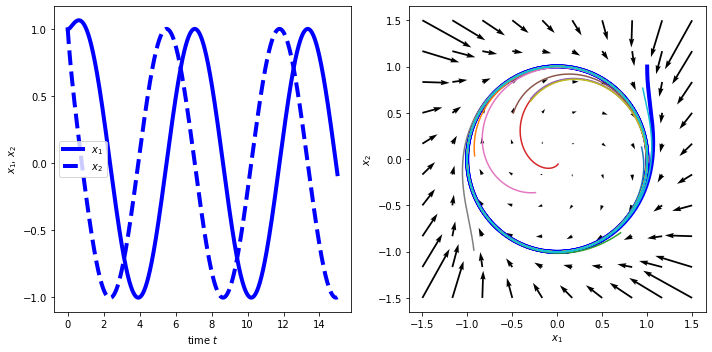

In [ ]:
# code for 2a.


def f(t,x,u):
    x1,x2 = x 
    dx1 = x2 + x1 * (1 - x1**2 - x2**2)
    dx2 = -x1 + x2 * (1 - x1**2 - x2**2)
    return np.array([dx1, dx2])

plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (1.,1.)
x0 = np.array([x10,x20])

# simulation time−−
t = 15

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1.5,+1.5, 10), np.linspace(-1.5, +1.5, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.plot(q_,dq_,'b',lw=4)

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

***Notes:***
* To receive full credit, the nonlinear system's vector field must be used to create the phase portrait (i.e. not the linear system $\dot{x} = A x$.

## subproblem (3b.)

Linearize the nonlinear system about the equilibrium $x_e = 0\in\mathbb{R}^2$:  provide matrix $A$ such that $\dot{x} \simeq A x$ for $x$ near $x_e$.

**Solution:**\
In state-space form, the nonlinear system is
$$\dot{x} = \frac{d}{dt} \left[\begin{matrix} x_1 \\ x_2 \end{matrix}\right] = \left[\begin{matrix} x_2+x_1-x_1^3-x_1x_2^2 \\ -x_1+x_2-x_1^2x_2-x_2^3 \end{matrix}\right] = f(x).$$

The Jacobian derivative of $f$ with respect to $x$ is
$$ \partial_x f = \left[\begin{matrix} \partial_{x_1} \dot{x}_1 &  \partial_{x_2} \dot{x}_1 \\  \partial_{x_1} \dot{x}_2 &  \partial_{x_2} \dot{x}_2 \end{matrix}\right] = \left[\begin{matrix} 1-3x_1^2-x_2^2 & 1-2x_1x_2 \\ -1-2x_1x_2 & 1-x_1^2-3x_2^2 \end{matrix}\right].$$

Evaluating the Jacobian at $x_e = 0$ yields
$$\partial_x f(x_e) = \boxed{\left[\begin{matrix} 1 & 1 \\ -1 & 1 \end{matrix}\right] = A}$$


***Notes:***
* To receive full credit, it was necessary to evaluate the Jacobian derivative $\partial_x f$ at the equilibrium $x_e = 0$.

# problem (4.)

Consider the state-space linear system $ \dot{x} = A x + B u$.

## subproblem (4a.)

Suppose $\lambda\in\mathbb{C}$ is an eigenvalue of $A$, so that there exists a nonzero vector $v\neq 0$ such that $A v = \lambda v$.

Show that $e^{\lambda t}$ is an eigenvalue of $e^{A t}$ where $t \in \mathbb{R}$, and explain what this means about the trajectory initialized at $x(0) = v$.

**Solution:**\
We will show that $A v = \lambda v$ for $v \neq 0$ implies $e^{A t} v = e^{\lambda t} v$, which demonstrates that $v$ is an eigenvector of $e^{A t}$ with eigenvalue $e^{\lambda t}$.

Recalling the formula for the matrix exponential,
$$ e^{A t} = \sum_{k=0}^\infty \frac{1}{k!} t^k A^k = I + t A + \frac{1}{2} t^2 A^2 + \cdots + \frac{1}{k!} t^k A^k + \cdots, $$
we compute
$$ e^{A t} v = \sum_{k=0}^\infty \frac{1}{k!} t^k A^k v = I + t A v + \frac{1}{2} t^2 A^2 v + \cdots + \frac{1}{k!} t^k A^k v + \cdots $$
$$ = I + t v + \frac{1}{2} t^2 \lambda^2 v + \cdots + \frac{1}{k!} t^k \lambda^k v + \cdots = \sum_{k=0}^\infty \frac{1}{k!} t^k \lambda^k v = e^{\lambda t} v. $$

If the initial state $x(0) = v$ is an eigenvector, $A v = \lambda v$, then 


***Notes:***
* This subproblem was intended to be solved for an arbitrary $n\times n$ matrix $A$, not the specific $2\times 2$ matrix in (4b.).
* To receive full credit, there cannot be significant errors in matrix/vector multiplication, e.g. column vector $v$ cannot multiply square matrix $e^{A t}$ or $(A - \lambda I)$ on the left, scalar $\lambda$ cannot be subtracted from matrix $A$.





## subproblem (4b.)

If $A = \left[ \begin{array}{cc} 0 & \omega \\ -\omega & 0 \end{array} \right]$, verify that $e^{At} = \left[ \begin{array}{cc} \cos\omega t & \sin\omega t \\ -\sin\omega t & \cos\omega t \end{array} \right]$ by verifying that $x(t) = e^{At} x(0)$ solves $\dot{x} = A x$ for all $x(0)$.

**Solution:**\
$x(t) = e^{At} x(0)$\
$\frac{d}{dt}x(t) = \frac{d}{dt}e^{At} x(0)$\
$\frac{d}{dt}x(t) = Ae^{At} x(0)$

$\frac{d}{dt} x(t) = \left[ \begin{array}{cc} 0 & \omega \\ -\omega & 0 \end{array} \right] \left[ \begin{array}{cc} \cos\omega t & \sin\omega t \\ -\sin\omega t & \cos\omega t \end{array} \right] x(0)$

$\frac{d}{dt} x(t) = \left[ \begin{array}{cc} -\omega\sin\omega t & \omega\cos\omega t \\ -\omega\cos\omega t & -\omega\sin\omega t \end{array} \right] x(0)$

On the other hand,\
$x(t) = e^{At} x(0)$\
$\frac{d}{dt}x(t) = \frac{d}{dt}e^{At} x(0)$

$\frac{d}{dt}x(t) = \frac{d}{dt}\left[ \begin{array}{cc} \cos\omega t & \sin\omega t \\ -\sin\omega t & \cos\omega t \end{array} \right] x(0)$

$\frac{d}{dt} x(t) = \left[ \begin{array}{cc} -\omega\sin\omega t & \omega\cos\omega t \\ -\omega\cos\omega t & -\omega\sin\omega t \end{array} \right] x(0)$

Thus, the statement is verified.




# problem (5.)

Consider proportional-integral control of an unstable first-order process:
$$
C(s) = k_P + \frac{1}{s} k_I,\ P(s) = \frac{1}{s - 1},
$$
and suppose $k_P$, $k_I$ are chosen to make the roots of the characteristic polynomial of the closed-loop system $\frac{PC}{1+PC}$ equal to $-\sigma \pm j\omega$:
$$
k_P = 2\sigma + 1,\ k_I = \sigma^2 + \omega^2.
$$

## subproblem (5a.)

Holding $k_I = 1$ constant, plot the root locus of the closed-loop characteristic polynomial as $k_P$ varies.

**Solution:**



(70,)


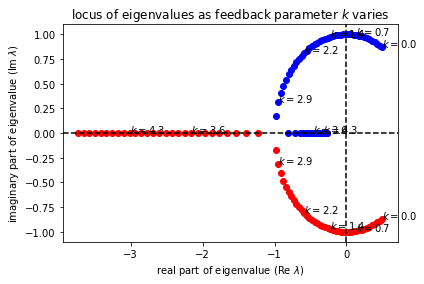

In [2]:
import numpy as np
import pylab as plt

# np.sqrt doesn't return complex numbers
# evaluating np.sqrt? brings up the "help", which points us to this replacement 
sqrt = np.lib.scimath.sqrt

#Choosing values of k for annotation

kp = np.linspace(0,5,70)
lambda1 = (-(kp - 1) + sqrt(((kp - 1)**2) - 4)) / 2
lambda2 = (-(kp - 1) - sqrt(((kp - 1)**2) - 4)) / 2

# confirm the non-real eigenvalues are complex-conjugates
assert np.allclose(lambda1[np.abs(lambda1.imag) > 0.],
                   np.conj(lambda2[np.abs(lambda1.imag) > 0]))

#Axis labels
plt.title('locus of eigenvalues as feedback parameter $k$ varies')
plt.xlabel(r'real part of eigenvalue ($\operatorname{Re}\ \lambda$)')
plt.ylabel(r'imaginary part of eigenvalue ($\operatorname{Im}\ \lambda$)')

#Plotting values
plt.scatter(lambda1.real,lambda1.imag,color='b')
plt.scatter(lambda2.real,lambda2.imag,color = 'r')
# we'll only annotate every 10 of the computed eigenvalues
for k,lam1,lam2 in list(zip(kp,lambda1,lambda2))[::10]:
  plt.annotate(r'$k=%0.1f$'%k,xy=(lam1.real,lam1.imag))
  plt.annotate(r'$k=%0.1f$'%k,xy=(lam2.real,lam2.imag))
#x- and y- limits and drawing axes
ylim = plt.ylim()
plt.plot(np.zeros(2),ylim,'k--')
xlim = plt.xlim()
plt.plot(xlim,np.zeros(2),'k--')
plt.xlim(xlim); plt.ylim(ylim);

## subproblem (5b.)

Determine the range of $k_P$ that results in a stable closed-loop system -- you may do this analytically (e.g. pen-and-paper) or numerically (e.g. using the root locus from (5a.)).

**Solution:**\
If the system is stable, the all eigenvalues must have negative real part, that is,\
$\sigma > 0$\
$\Rightarrow \frac{k_p -1}{2} > 0$
$\Rightarrow \boxed{k_p  > 1}.$


***Notes:***
* This problem had an ambiguity:  if you assume $\omega$ must be real, then $1 < k_P < 3$ is necessary; if you allow $\omega$ to be imaginary, then only $k_P > 1$ is necessary for stability -- either answer should receive full credit.